In [15]:
import random
import matplotlib.pyplot as plt
from simulator import Simulator
import constants

获取屏幕尺寸

In [16]:
screen_width = 3840  # 假设一个默认屏幕宽度
screen_height = 2160  # 假设一个默认屏幕高度

侧边栏宽度

In [17]:
sidebar_width = constants.CONTROL_PANEL_WIDTH

定义游戏状态

In [18]:
game_state = constants.MAIN_MENU

初始化模拟器

In [19]:
sim = Simulator(screen_width, screen_height)

初始化帧率

In [20]:
fps = constants.DEFAULT_FPS

迭代计数器

In [21]:
iteration_count = 0

初始化数据记录结构

In [22]:
prey_counts = []
predator_counts = []
prey_born_count = 0
predator_born_count = 0

创建图表

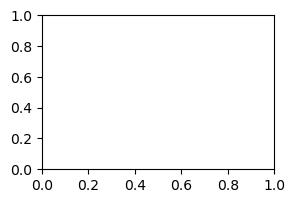

In [23]:
fig, ax = plt.subplots(figsize=(3, 2))  # 设置图表尺寸适应侧边栏

In [24]:
def update_plot(prey_counts, predator_counts):
    ax.clear()
    ax.plot(prey_counts, label="Prey", color='blue')
    ax.plot(predator_counts, label="Predator", color='red')
    ax.legend(loc='upper right')
    ax.set_title("Population Over Time")
    plt.show()

主循环

In [25]:
running = True
selected_agent = None

In [27]:
while running:
    delta_time = 1.0 / fps  # 假设每帧的时间为1/fps秒
    if game_state == constants.MAIN_MENU:
        # 处理主菜单逻辑
        game_state = constants.IN_GAME  # 默认直接进入游戏状态
    elif game_state == constants.IN_GAME:
        sim.check_events()
        sim.add_food()  # 传递时间间隔
        # import pdb;pdb.set_trace()
        sim.move_models()
        sim.prey_hunt()
        sim.predator_hunt()
        sim.decrease_health()  # 更新健康值
        sim.remove_dead()  # 清理死亡个体
        iteration_count += 1  # 增加迭代计数器

        # 每100个回合输出日志
        if iteration_count % 10 == 0:
            new_prey_born, new_predator_born = sim.applyGeneticAlgorithm()

        # 更新数据记录结构
        prey_counts.append(len(sim.prey))
        predator_counts.append(len(sim.predators))

        # 更新并绘制图表
        update_plot(prey_counts, predator_counts)

        # 显示迭代次数
        print(f"Iteration: {iteration_count}")
        if selected_agent:
            agent_info = (
                f"{selected_agent.__class__.__name__}: "
                f"Position ({selected_agent.rect.x}, {selected_agent.rect.y}), "
                f"Velocity ({selected_agent.velocity[0]}, {selected_agent.velocity[1]}), "
                f"Health ({selected_agent.health})"
            )
            print(agent_info)

    # 停止条件，可以根据需求设置
    if iteration_count >= 1000000:  # 假设迭代1000次后停止
        running = False

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73


KeyboardInterrupt: 

In [ ]:
print("Simulation finished.")